In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

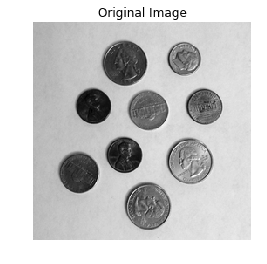

In [2]:
img = cv2.imread('images/coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

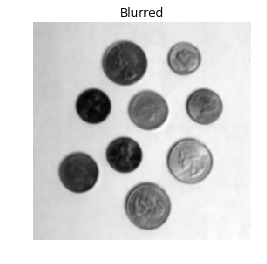

In [3]:
blurred = cv2.GaussianBlur(img, (5,5), 0)

plt.imshow(blurred,cmap='gray')
plt.title("Blurred")
plt.axis("off")
plt.show()

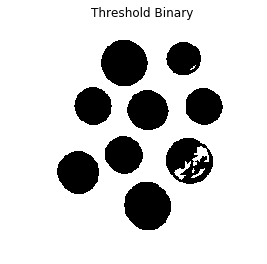

In [4]:
(T,thresh) = cv2.threshold(blurred, 155,255, cv2.THRESH_BINARY)

plt.imshow(thresh,cmap='gray')
plt.title("Threshold Binary")
plt.axis("off")
plt.show()

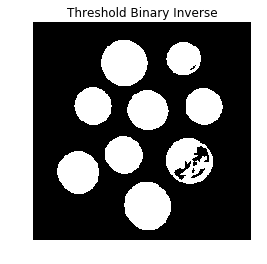

In [5]:
(T, threshInv) = cv2.threshold(blurred, 155,255, cv2.THRESH_BINARY_INV)

plt.imshow(threshInv,cmap='gray')
plt.title("Threshold Binary Inverse")
plt.axis("off")
plt.show()

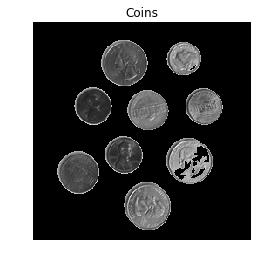

In [6]:
bwize = cv2.bitwise_and(img, img,mask=threshInv)

plt.imshow(bwize,cmap='gray')
plt.title("Coins")
plt.axis("off")
plt.show()

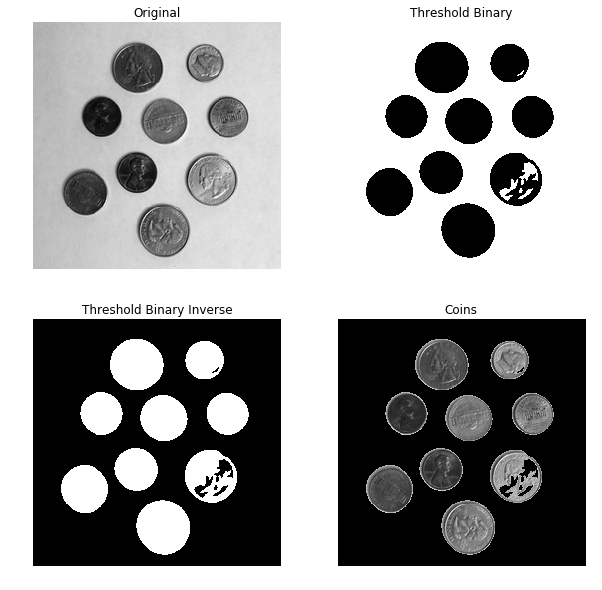

In [7]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(2,2,2), plt.imshow(thresh,cmap='gray')
plt.title('Threshold Binary'),plt.axis("off")

plt.subplot(2,2,3), plt.imshow(threshInv,cmap='gray')
plt.title('Threshold Binary Inverse'),plt.axis("off")

plt.subplot(2,2,4), plt.imshow(bwize,cmap='gray')
plt.title('Coins'),plt.axis("off")
plt.show()

### Adaptive Thresholding

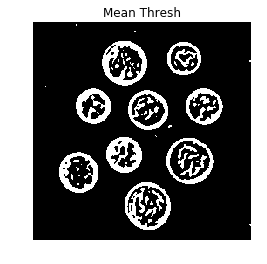

In [8]:
img = cv2.imread('images/coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(img, (5,5), 0)

m_thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,4)


plt.imshow(m_thresh,cmap='gray')
plt.title("Mean Thresh")
plt.axis("off")
plt.show()




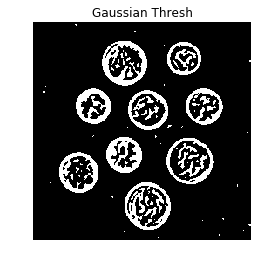

In [9]:
img = cv2.imread('images/coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(img, (5,5), 0)

g_thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,3)


plt.imshow(g_thresh,cmap='gray')
plt.title("Gaussian Thresh")
plt.axis("off")
plt.show()


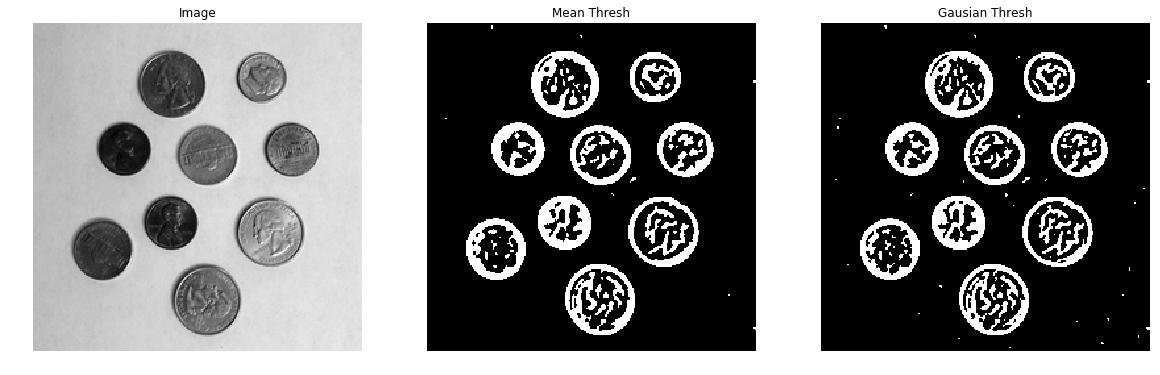

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Image'),plt.axis("off")

plt.subplot(1,3,2), plt.imshow(m_thresh, cmap='gray')
plt.title('Mean Thresh'),plt.axis("off")

plt.subplot(1,3,3), plt.imshow(g_thresh, cmap='gray')
plt.title('Gausian Thresh'),plt.axis("off")

plt.show()


### Otsu and Riddlger-calvard

In [11]:
import mahotas

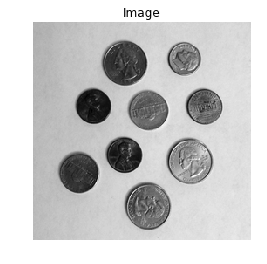

In [12]:
img = cv2.imread('images/coins.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(img, (5,5), 0)


plt.imshow(img,cmap='gray')
plt.title("Image")
plt.axis("off")
plt.show()


Otsu's threshold: 137


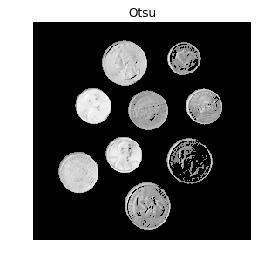

In [13]:
T= mahotas.thresholding.otsu(blurred)

print("Otsu's threshold: {}".format(T))


thresh = img.copy()
thresh[thresh > T] = 255

thresh = cv2.bitwise_not(thresh)

plt.imshow(thresh,cmap='gray')
plt.title("Otsu")
plt.axis("off")
plt.show()


Riddler-Calvard: 137.799281092233


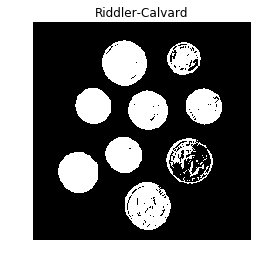

In [14]:
T = mahotas.thresholding.rc(blurred) 

print("Riddler-Calvard: {}".format(T))
thresh = img.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)

plt.imshow(thresh,cmap='gray')
plt.title("Riddler-Calvard")
plt.axis("off")
plt.show()
